In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

## EDA

In [8]:
books = pd.read_csv('data/Books.csv')
ratings = pd.read_csv("data/Ratings.csv")
users = pd.read_csv("data/Users.csv")

In [9]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [10]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [11]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [12]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

There are only a few missing values in Books

In [13]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

Age has maximum number of missing values

In [14]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

Ratings has No missing values

In [15]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [16]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [17]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


Check for unique values in all datasets

In [18]:
books.nunique()

ISBN                   271360
Book-Title             242135
Book-Author            102022
Year-Of-Publication       202
Publisher               16807
Image-URL-S            271044
Image-URL-M            271044
Image-URL-L            271041
dtype: int64

In [19]:
users.nunique()

User-ID     278858
Location     57339
Age            165
dtype: int64

In [20]:
ratings.nunique()

User-ID        105283
ISBN           340556
Book-Rating        11
dtype: int64

**Check the top 20 years for books**
<br>
We can see that in 2002 most books were published

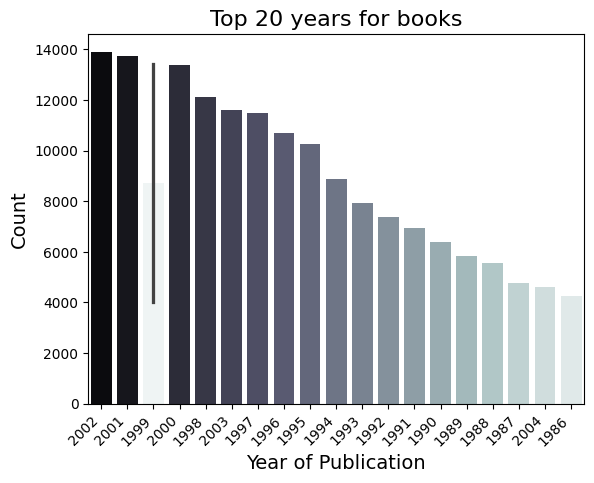

In [22]:
top_year_books = books['Year-Of-Publication'].value_counts().head(20)
sns.barplot(x=top_year_books.index, y= top_year_books.values,palette='bone')
plt.title('Top 20 years for books', fontsize=16)
plt.xlabel('Year of Publication', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

**Check Top 20 Authors**
<br>
Agatha Christie is the top author with over 600 books published
<br>
William Shakespeare is on second with other prominent authors among them like Stephen King, Jane Austen



In [24]:
top_author_books = books['Book-Author'].value_counts().head(20)
top_author_books

Book-Author
Agatha Christie          632
William Shakespeare      567
Stephen King             524
Ann M. Martin            423
Carolyn Keene            373
Francine Pascal          372
Isaac Asimov             330
Nora Roberts             315
Barbara Cartland         307
Charles Dickens          302
Not Applicable (Na )     286
R. L. Stine              282
Mark Twain               231
Jane Austen              223
Terry Pratchett          220
Mary Higgins Clark       218
Piers Anthony            217
Marion Zimmer Bradley    216
Janet Dailey             214
Franklin W. Dixon        204
Name: count, dtype: int64

There are some Not applicable Authors, so we will remove them

In [25]:
author_books = books[books['Book-Author'] != 'Not Applicable (Na )']
top_author_books = author_books['Book-Author'].value_counts().head(20)
top_author_books

Book-Author
Agatha Christie          632
William Shakespeare      567
Stephen King             524
Ann M. Martin            423
Carolyn Keene            373
Francine Pascal          372
Isaac Asimov             330
Nora Roberts             315
Barbara Cartland         307
Charles Dickens          302
R. L. Stine              282
Mark Twain               231
Jane Austen              223
Terry Pratchett          220
Mary Higgins Clark       218
Piers Anthony            217
Marion Zimmer Bradley    216
Janet Dailey             214
Franklin W. Dixon        204
Roald Dahl               195
Name: count, dtype: int64

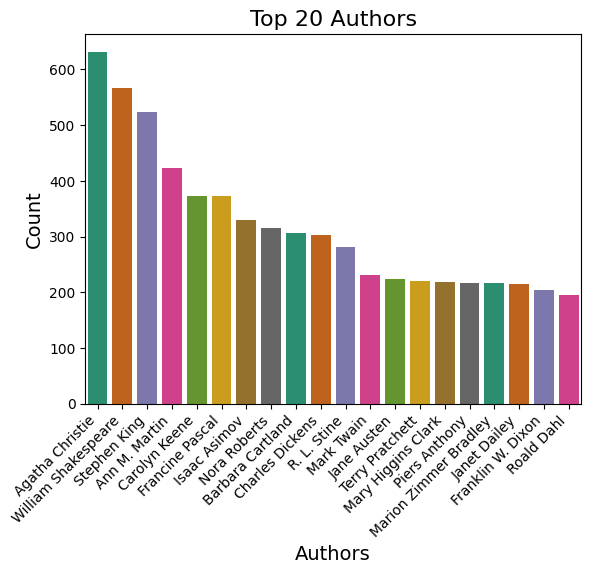

<Figure size 800x800 with 0 Axes>

In [26]:
sns.barplot(x=top_author_books.index, y= top_author_books.values,palette='Dark2')
plt.title('Top 20 Authors', fontsize=16)
plt.xlabel('Authors', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.figure(figsize=(8, 8))
plt.show()

**Top 20 publishers who published**
<br>
Harlequin Publishers have published the most books

In [27]:
top_publisher_books = author_books['Publisher'].value_counts().head(20)
top_publisher_books

Publisher
Harlequin                   7535
Silhouette                  4220
Pocket                      3905
Ballantine Books            3782
Bantam Books                3646
Scholastic                  3159
Simon &amp; Schuster        2968
Penguin Books               2844
Berkley Publishing Group    2770
Warner Books                2727
Penguin USA                 2715
Harpercollins               2523
Fawcett Books               2258
Signet Book                 2070
Random House Inc            2041
St Martins Pr               1952
St. Martin's Press          1783
Tor Books                   1704
HarperCollins Publishers    1700
Zebra Books                 1694
Name: count, dtype: int64

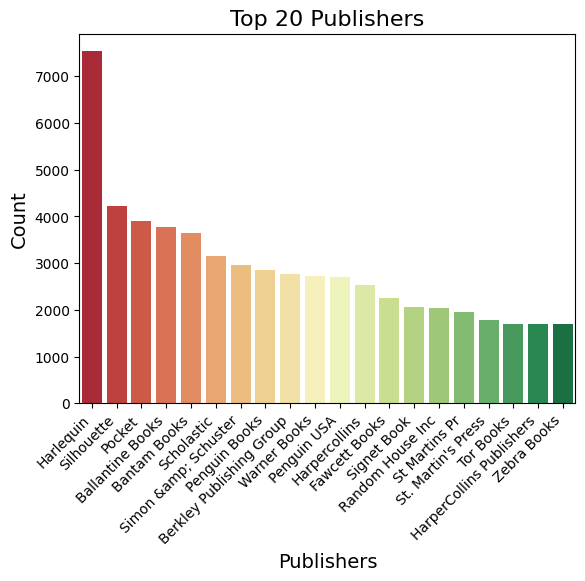

<Figure size 800x800 with 0 Axes>

In [28]:
sns.barplot(x=top_publisher_books.index, y= top_publisher_books.values,palette='RdYlGn')
plt.title('Top 20 Publishers', fontsize=16)
plt.xlabel('Publishers', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.figure(figsize=(8, 8))
plt.show()

# Popularity Based Recommender

In [37]:
rating_book_name = ratings.merge(books,on='ISBN')

In [30]:
num_of_rating_df = rating_book_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_of_rating_df.rename(columns={'Book-Rating':'num_of_ratings'},inplace=True)
num_of_rating_df

,Book-Title,num_of_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [52]:
avg_rating_df = rating_book_name.groupby('Book-Title').mean(numeric_only=True)['Book-Rating'].reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_rating'},inplace=True)
avg_rating_df

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [53]:
popular_df = num_of_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df

,Book-Title,num_of_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


To filter these Popular books, I took only those books which has more than 250 rating and from those only top 50 books to build popularity0-based recommender

In [54]:
popularity_recommender = popular_df[popular_df['num_of_ratings']>=250].sort_values('avg_rating',ascending=False).head(50)

In [55]:
# Since there are duplicates in book titles too, so need to drop them and take only relevant columns
popularity_recommender = popularity_recommender.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Year-Of-Publication','Image-URL-M','num_of_ratings','avg_rating' ]]

We can see that Harry Potter books are the most popular based on our recommender, followed by Lord of the rings series

In [56]:
popularity_recommender

,Book-Title,Book-Author,Year-Of-Publication,Image-URL-M,num_of_ratings,avg_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,1999,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,1998,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,2000,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,1986,http://images.amazon.com/images/P/0345339681.0...,281,5.007117
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,1986,http://images.amazon.com/images/P/0345339703.0...,368,4.948370
26,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,http://images.amazon.com/images/P/059035342X.0...,575,4.895652
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,1986,http://images.amazon.com/images/P/0345339711.0...,260,4.880769
39,To Kill a Mockingbird,Harper Lee,1988,http://images.amazon.com/images/P/0446310786.0...,510,4.700000


# Collaborative Filtering Based Recommender System

In [57]:
user_ratings_count = rating_book_name['User-ID'].value_counts()
user_ids = user_ratings_count[user_ratings_count > 200].index.tolist()

In [58]:
filtered_rating = rating_book_name[rating_book_name['User-ID'].isin(user_ids)]

In [59]:
book_ratings_count = filtered_rating['Book-Title'].value_counts()
selected_books = book_ratings_count[book_ratings_count >= 50].index.tolist()

In [60]:
final_filtered_ratings = filtered_rating[filtered_rating['Book-Title'].isin(selected_books)]

In [61]:
collaborative_filter = final_filtered_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [62]:
collaborative_filter.fillna(0,inplace=True)

In [63]:
collaborative_filter

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
similarity_scores = cosine_similarity(collaborative_filter)

In [65]:
similarity_scores.shape

(706, 706)

In [67]:
def recommender(book_name):
    index = np.where(collaborative_filter.index==book_name)[0][0]
    similar_items = sorted(enumerate(similarity_scores[index]), key=lambda x: x[1], reverse=True)[1:11]
    recommended_books  = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == collaborative_filter.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Year-Of-Publication'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        recommended_books .append(item)

    return recommended_books

In [68]:
np.where(collaborative_filter.index=='Zoya')[0][0]

704

In [69]:
recommender('A Bend in the Road')

[['A Walk to Remember',
  'Nicholas Sparks',
  2000,
  'http://images.amazon.com/images/P/0446608955.01.MZZZZZZZ.jpg'],
 ['The Last Time They Met : A Novel',
  'Anita Shreve',
  2002,
  'http://images.amazon.com/images/P/0316781266.01.MZZZZZZZ.jpg'],
 ['Sea Glass: A Novel',
  'Anita Shreve',
  2003,
  'http://images.amazon.com/images/P/0316089699.01.MZZZZZZZ.jpg'],
 ['Angels',
  'Marian Keyes',
  2002,
  'http://images.amazon.com/images/P/0060008024.01.MZZZZZZZ.jpg'],
 ['Family Album',
  'Danielle Steel',
  1989,
  'http://images.amazon.com/images/P/0440124344.01.MZZZZZZZ.jpg'],
 ['Cradle and All',
  'James Patterson',
  2000,
  'http://images.amazon.com/images/P/0316690619.01.MZZZZZZZ.jpg'],
 ['Nights in Rodanthe',
  'Nicholas Sparks',
  2002,
  'http://images.amazon.com/images/P/0446531332.01.MZZZZZZZ.jpg'],
 ['By the Light of the Moon',
  'DEAN KOONTZ',
  2003,
  'http://images.amazon.com/images/P/0553582763.01.MZZZZZZZ.jpg'],
 ['The Rescue',
  'Nicholas Sparks',
  2001,
  'http://i